# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stat
import pylab
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/FachryYusrie/Proyek-Machine-Learning-Heart-Disease-Analysis/refs/heads/main/Data/heart_disease.csv')
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect
1,1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal
2,2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect
3,3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal
4,4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        1013 non-null   int64  
 1   age       1013 non-null   int64  
 2   sex       1013 non-null   object 
 3   dataset   1013 non-null   object 
 4   cp        1013 non-null   object 
 5   trestbps  954 non-null    float64
 6   chol      983 non-null    float64
 7   fbs       923 non-null    object 
 8   restecg   1011 non-null   object 
 9   thalch    958 non-null    float64
 10  exang     958 non-null    object 
 11  oldpeak   951 non-null    float64
 12  slope     704 non-null    object 
 13  ca        402 non-null    float64
 14  thal      526 non-null    object 
dtypes: float64(5), int64(2), object(8)
memory usage: 118.8+ KB


In [4]:
df.describe(include='all')

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
count,1013.000000,1013.000000,1013,1013,1013,954.000000,983.000000,923,1011,958.000000,958,951.000000,704,402.000000,526
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal
freq,NaN,NaN,792,304,537,NaN,NaN,773,592,NaN,593,NaN,382,NaN,249
mean,506.000000,53.609082,NaN,NaN,NaN,132.241090,203.680570,NaN,NaN,138.899791,NaN,0.915457,NaN,0.654229,NaN
std,292.572213,9.325535,NaN,NaN,NaN,18.763915,107.464263,NaN,NaN,25.773882,NaN,1.100767,NaN,0.927466,NaN
min,0.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN
25%,253.000000,47.000000,NaN,NaN,NaN,120.000000,181.500000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN
50%,506.000000,54.000000,NaN,NaN,NaN,130.000000,226.000000,NaN,NaN,140.000000,NaN,0.600000,NaN,0.000000,NaN
75%,759.000000,60.000000,NaN,NaN,NaN,140.000000,269.000000,NaN,NaN,159.750000,NaN,1.600000,NaN,1.000000,NaN


In [5]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [6]:
df.shape

(1013, 15)

In [7]:
# kolom "id" tidak diperlukan sehingga perlu dipisahkan dari dataset
df = df.drop(["id"],axis=1)

In [8]:
# kelompok fitur berdasarkan tipe datanya
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object'] # fitur dengan tipe data numerik
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object'] # fitur dengan tipe data kategori
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20] # fitur numerik dengan tipe data diskrit
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature] # fitur numerik dengan tipe data kontinu

<Axes: >

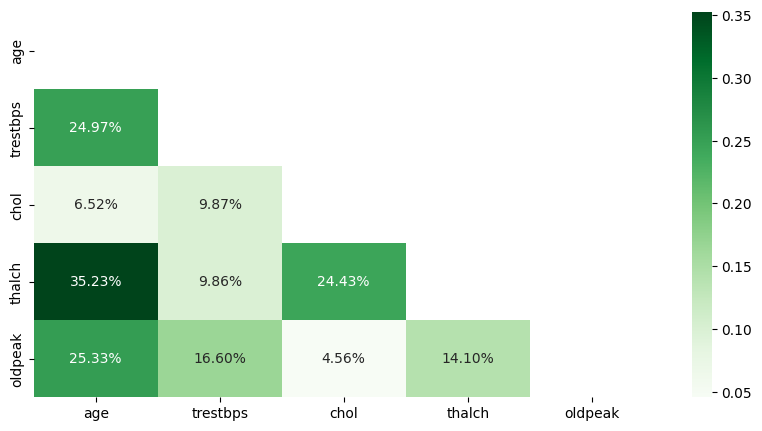

In [9]:
# korelasi fitur data kontinu
plt.figure(figsize=(10, 5))
sns.heatmap(df[continuous_feature].corr().abs(), cmap='Greens',mask=np.triu(df[continuous_feature].corr()),fmt = '.2%', annot=True)

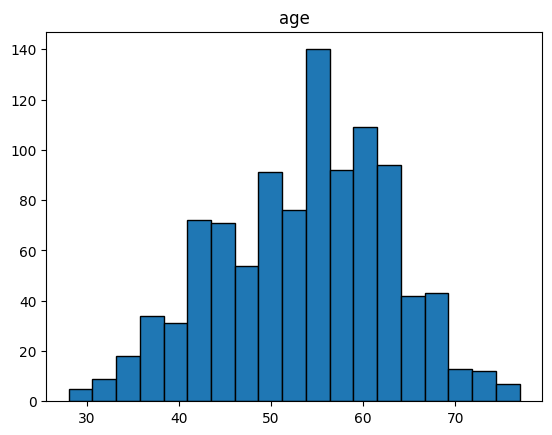

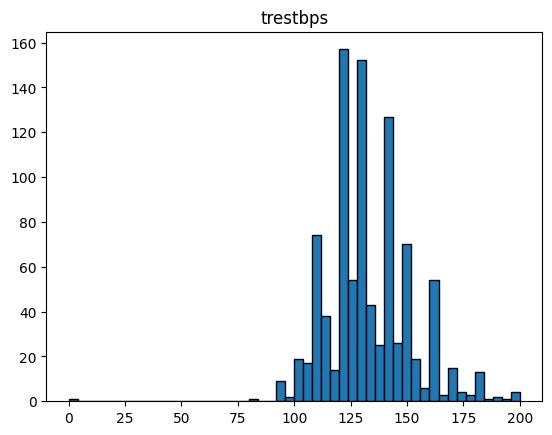

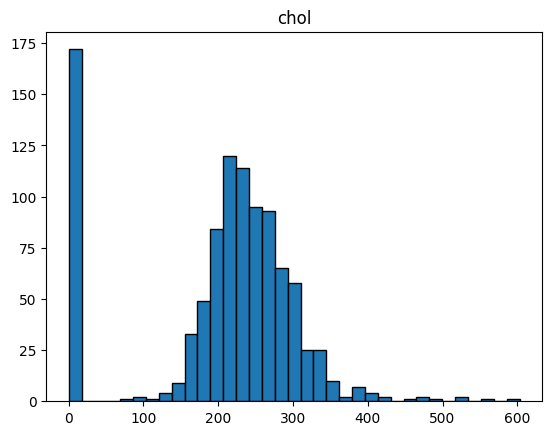

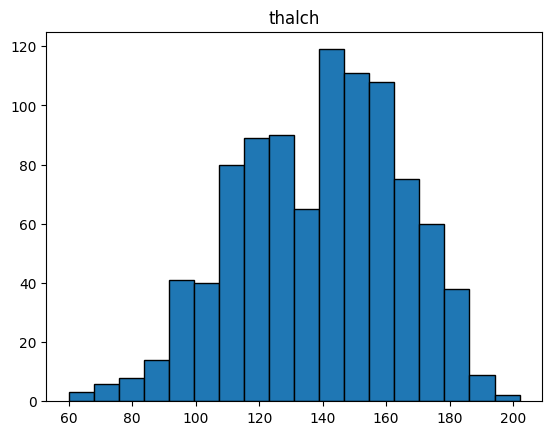

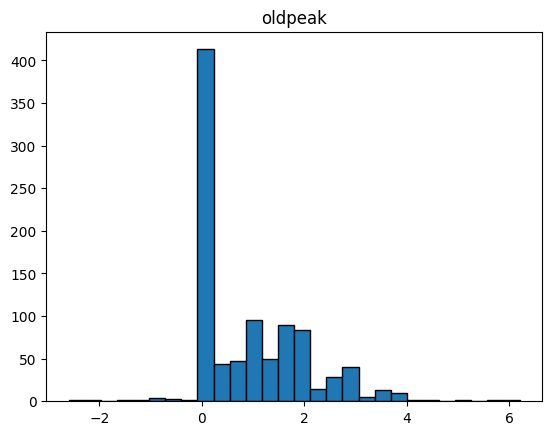

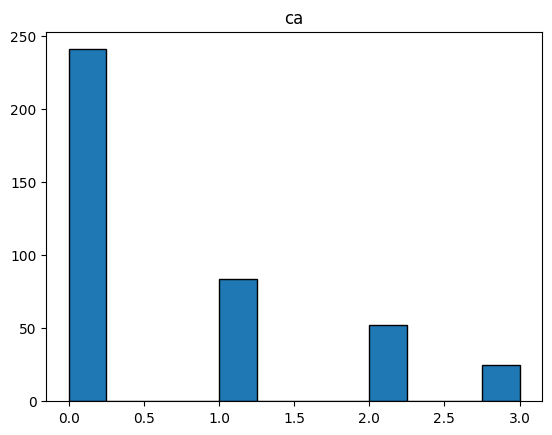

In [10]:
# visualisasi distribusi data numerik
for col in numerical_features:
    # membuat plot distribusi dari kolom numerik
    plt.hist(df[col], bins='auto', edgecolor='black')
    plt.title(col)
    plt.show()

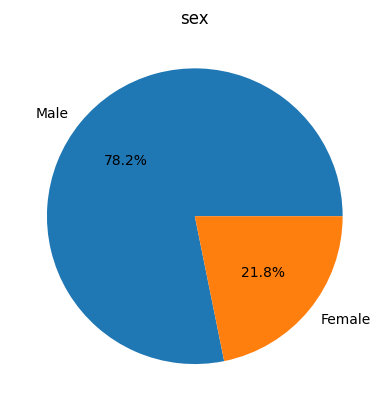

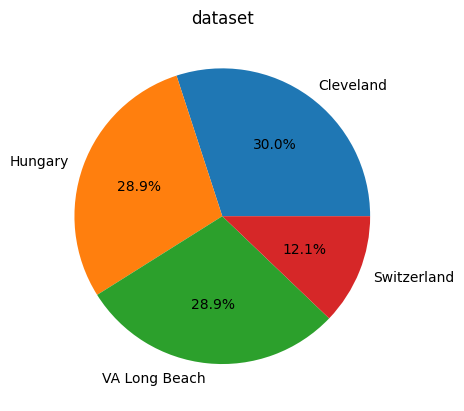

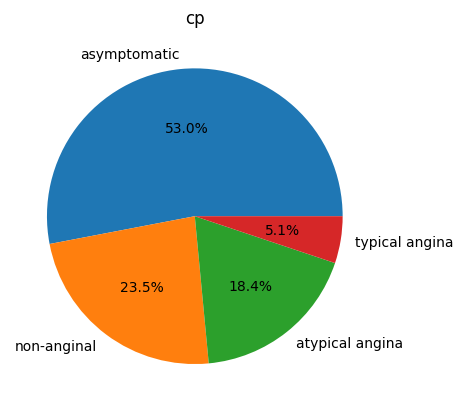

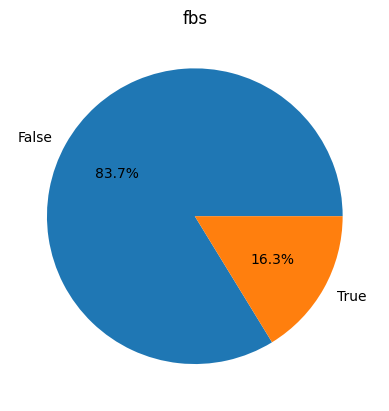

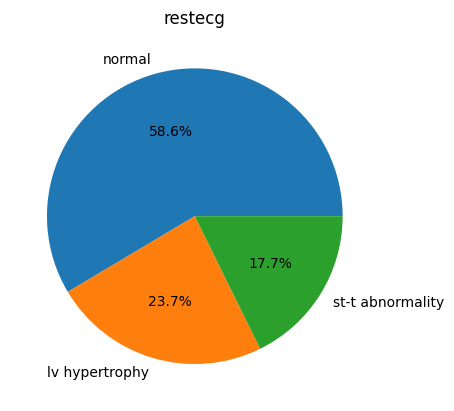

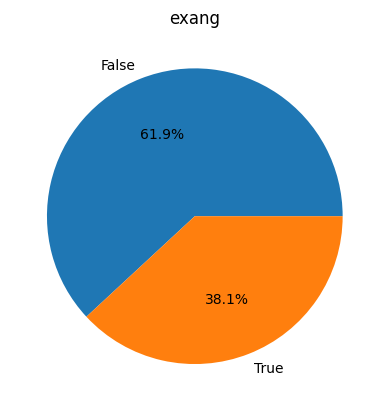

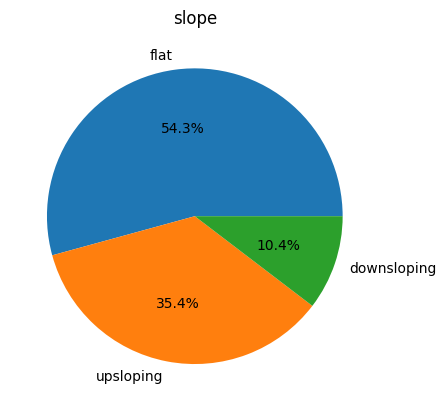

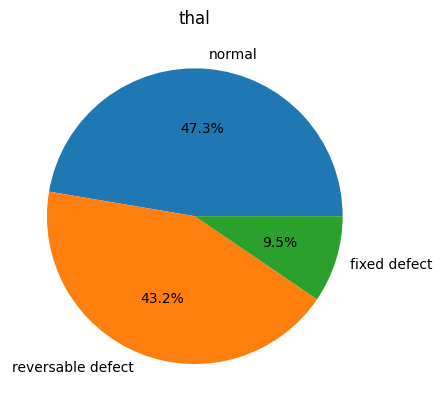

In [11]:
# visualisasi distribusi data kategori
for col in categorical_features:
    # membuat plot distribusi dari kolom kategori
    # menghitung nilai frekuensi dari setiap kolom
    catcol_counts = df[col].value_counts()

    # membuat distribusi dalam bentuk pie chart
    plt.pie(catcol_counts.values, labels=catcol_counts.index, autopct='%1.1f%%')
    plt.title(col)
    plt.show()

<Axes: title={'center': 'Heatmap of Missing Values'}>

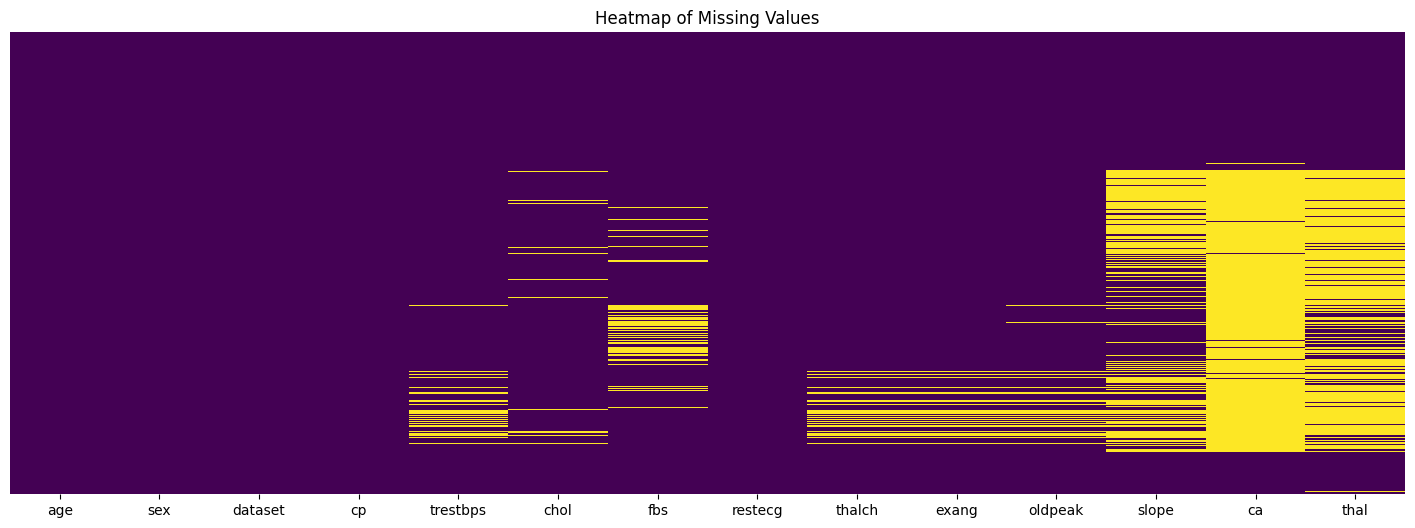

In [12]:
# persebaran missing value dari fitur pada dataset
plt.figure(figsize=(18,6))
plt.title('Heatmap of Missing Values')
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [13]:
# jumlah persentase missing value untuk setiap fitur
features_with_na = [features for features in df.columns if df[features].isnull().sum()>1]
for feature in features_with_na:
    print(feature, ' % ',np.round(df[feature].isnull().mean(), 4),  'missing values')

trestbps  %  0.0582 missing values
chol  %  0.0296 missing values
fbs  %  0.0888 missing values
restecg  %  0.002 missing values
thalch  %  0.0543 missing values
exang  %  0.0543 missing values
oldpeak  %  0.0612 missing values
slope  %  0.305 missing values
ca  %  0.6032 missing values
thal  %  0.4808 missing values


<Axes: title={'center': 'Correlation of Missing Values'}>

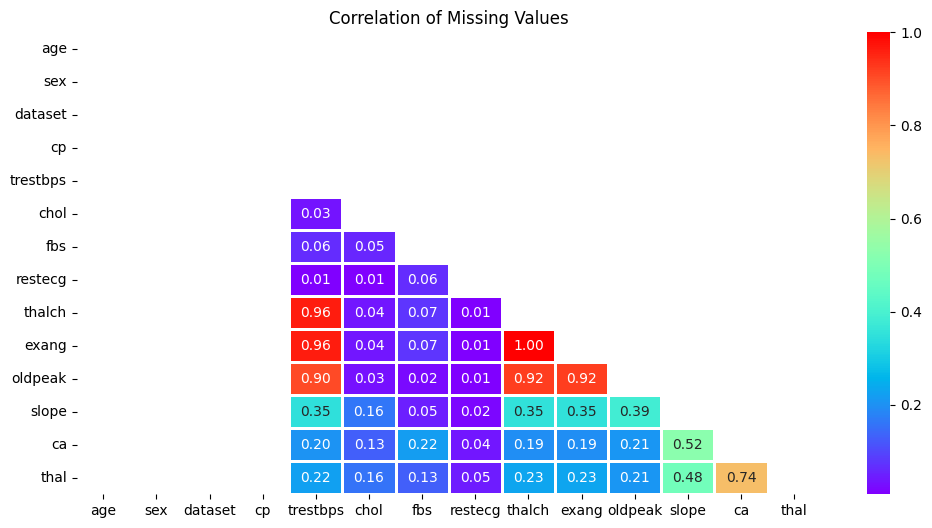

In [14]:
# korelasi dari missing value
plt.figure(figsize=(12, 6))
plt.title('Correlation of Missing Values')
sns.heatmap(df.isnull().corr().abs(), cmap='rainbow',linewidths = 1,mask=np.triu(df.isnull().corr()),fmt = '.2f', annot=True)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [15]:
# mengganti missing value dari fitur dengan "0" untuk data numerik dan "None" untuk data kategorikal
df[['thalch']] = df[['thalch']].fillna(0)
df[['oldpeak']] = df[['oldpeak']].fillna(0)
df[['chol']] = df[['chol']].fillna(0)
df[['trestbps']] = df[['trestbps']].fillna(0)
df[['ca']] = df[['ca']].fillna(0)
df[['exang']] = df[['exang']].fillna('None')
df[['restecg']] = df[['restecg']].fillna('None')
df[['fbs']] = df[['fbs']].fillna('None')
df[['thal']] = df[['thal']].fillna('None')
df[['slope']] = df[['slope']].fillna('None')

In [16]:
# cek apakah masih terdapat missing value
df.isna().sum()

,0
age,0
sex,0
dataset,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0


In [17]:
# menunjukkan semua nilai unik pada fitur "oldpeak"
df['oldpeak'].unique()

array([ 2.3,  1.5,  2.6,  3.5,  1.4,  0.8,  3.6,  0.6,  3.1,  0.4,  1.3,
        0. ,  0.5,  1.6,  1. ,  1.2,  0.2,  1.8,  3.2,  2.4,  2. ,  2.5,
        2.2,  2.8,  3. ,  3.4,  6.2,  4. ,  5.6,  2.9,  0.1,  2.1,  1.9,
        4.2,  0.9,  1.1,  3.8,  0.7,  0.3,  4.4,  5. , -1.1, -1.5, -0.1,
       -2.6, -0.7, -2. , -1. ,  1.7, -0.8, -0.5, -0.9,  3.7])

In [18]:
# mengklasifikasikan oldpeak berdasarkan tingkatan depresi ST disebabkan oleh olahraga dibandingkan dengan istirahat
def classify_oldpeak(oldpeak_value):
    if oldpeak_value < -2.5:
        return 'Depresi ST Parah'
    elif -2.5 <= oldpeak_value < -1:
        return 'Depresi ST Sedang'
    elif -1 <= oldpeak_value < 0:
        return 'Depresi ST Ringan'
    elif 0 <= oldpeak_value < 1:
        return 'Peningkatan ST Ringan'
    elif 1 <= oldpeak_value < 2:
        return 'Peningkatan ST Sedang'
    else:
        return 'Peningkatan ST Parah'

# terapkan klasifikasi diatas pada dataset
df['Oldpeak_Category'] = df['oldpeak'].apply(classify_oldpeak)

In [19]:
# mengklasifikasikan nilai kolesterol pada "low_limit" dan "high_limit"
cholesterol_values = np.array([199, 200, 240])
low_limit = 200
high_limit = 240
df['Cholesterol_Group'] = np.where(df['chol'] <= low_limit, 0, np.where(df['chol']< high_limit, 1, 2)).astype(int)

In [20]:
# mengklasifikasikan umur pasien menjadi 4 grup (0, 1, 2, 3)
df['Age_Group'] = pd.cut(df['age'], bins=[19, 29, 49, 64, 99], labels = [0, 1, 2, 3]).astype('int16')

In [21]:
# Tekanan Darah Istirahat Normal:
# Sistolik: 90 - 120 mmHg
# Diastolik: 60 - 80 mmHg
# Namun, nilai-nilai ini dapat bervariasi tergantung pada faktor pribadi dan status kesehatan.
# Selain itu, klasifikasi yang digunakan untuk diagnosis hipertensi (tekanan darah tinggi) biasanya adalah sebagai berikut:
# Normal: Sistolik < 120 mmHg dan Diastolik < 80 mmHg
# Normal Tinggi: Sistolik 120-129 mmHg dan Diastolik < 80 mmHg
# Hipertensi Tahap 1: Sistolik 130-139 mmHg atau Diastolik 80-89 mmHg
# Hipertensi Tahap 2: Sistolik ≥ 140 mmHg atau Diastolik ≥ 90 mmHg
# mengklasifikasikan tekanan darah di bawah low_limit dan di atas high_limit
normal_trestbps = (60,120)
df['trestbps_Group'] = np.where(df['trestbps'] <= low_limit, 0, np.where(df['trestbps']< high_limit, 1, 2)).astype(int)

In [22]:
# mengklasifikasikan denyut jantung maksimum menjadi di bawah normal dan di atas normal
# untuk Normal: 120 ≤ Thalach ≤ 160
normal_thalch = (60,120)
df['thalch_Group'] = np.where(np.logical_and(df['thalch'] >= normal_thalch[0] , df['thalch']<=normal_thalch[1]), 1, 0).astype(int)

In [23]:
# pisahkan tabel 'chol', 'age' dan 'trestbps' karena kita memakai kolom baru hasil klasifikasi sebelumnya
df = df.drop(['chol','age','trestbps'],axis=1)

In [24]:
# terapkan encoding pada data kategori
df = pd.get_dummies(df, drop_first=True, dtype=int)

In [25]:
df.head()

,thalch,oldpeak,ca,Cholesterol_Group,Age_Group,trestbps_Group,thalch_Group,sex_Male,dataset_Hungary,dataset_Switzerland,...,slope_flat,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Oldpeak_Category_Depresi ST Ringan,Oldpeak_Category_Depresi ST Sedang,Oldpeak_Category_Peningkatan ST Parah,Oldpeak_Category_Peningkatan ST Ringan,Oldpeak_Category_Peningkatan ST Sedang
0,150.0,2.3,0.0,1,2,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,108.0,1.5,3.0,2,3,0,1,1,0,0,...,1,0,0,1,0,0,0,0,0,1
2,129.0,2.6,2.0,1,3,0,0,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,187.0,3.5,0.0,2,1,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
4,172.0,1.4,0.0,1,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [26]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes !='object']
categorical_features= [feature for feature in df.columns if df[feature].dtypes =='object']
discrete_feature=[feature for feature in numerical_features if len(df[feature].unique())<20]
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature]

<Figure size 3000x12000 with 0 Axes>

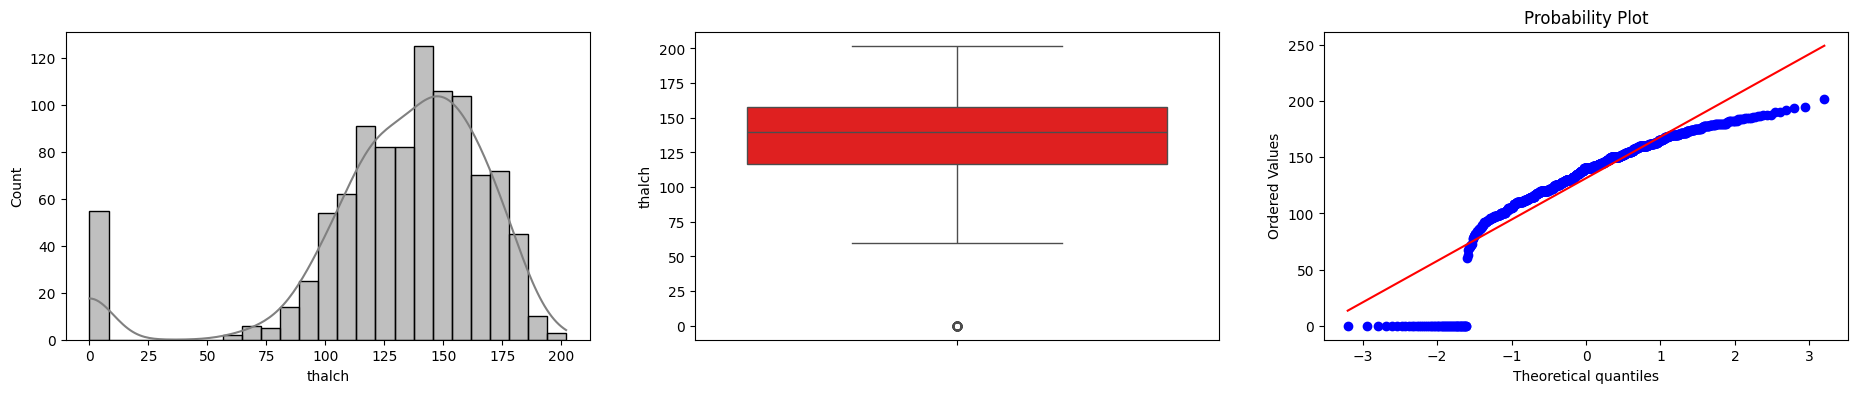

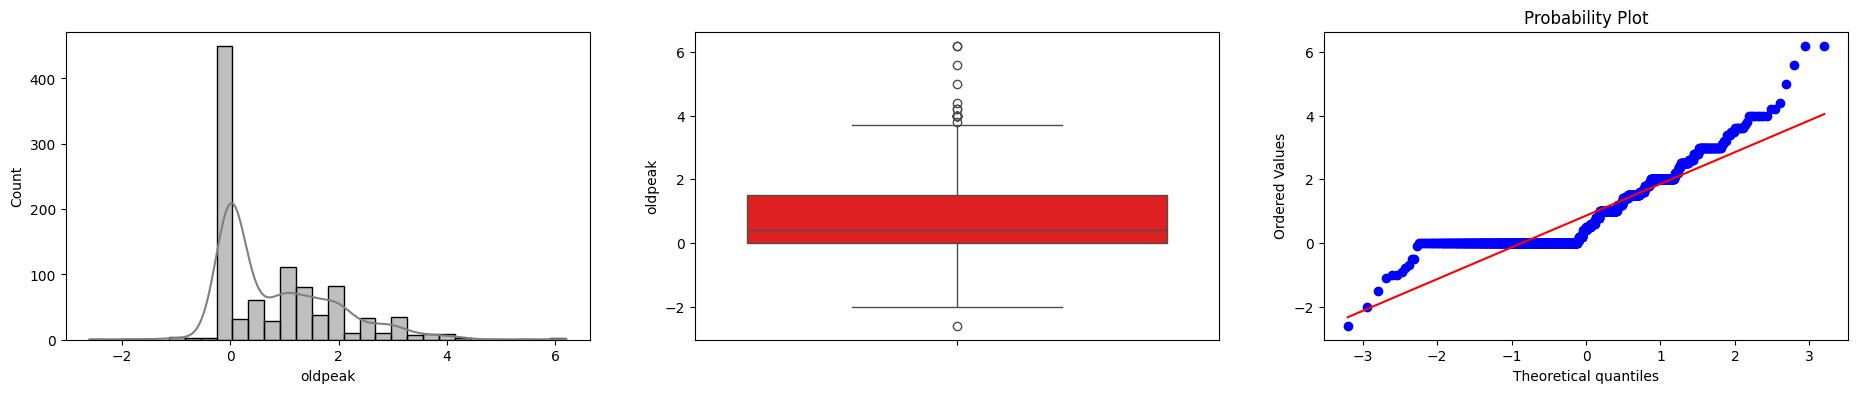

In [27]:
# Melakukan pemeriksaan awal terhadap variabel numerik kontinu pada histogram dan menghilangkan distorsi dan anomali:
plt.figure(figsize=(30,120),facecolor='white')
plotnumber=1
for feature in continuous_feature:
                plt.figure(figsize=(23,4))
                plt.subplot(1,3,1)
                sns.histplot(df[feature],color="gray", kde=True)
                plt.subplot(1,3,2)
                sns.boxplot(df[feature],color='red')
                plt.subplot(1,3,3)
                stat.probplot(df[feature],dist='norm',plot=pylab)
plt.show()

In [28]:
# menggunakan IQR untuk memeriksa outlier
for col in continuous_feature:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5 * IQR)
    upper = Q3 + (1.5 * IQR)
    df[col]= np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))

<Figure size 3000x12000 with 0 Axes>

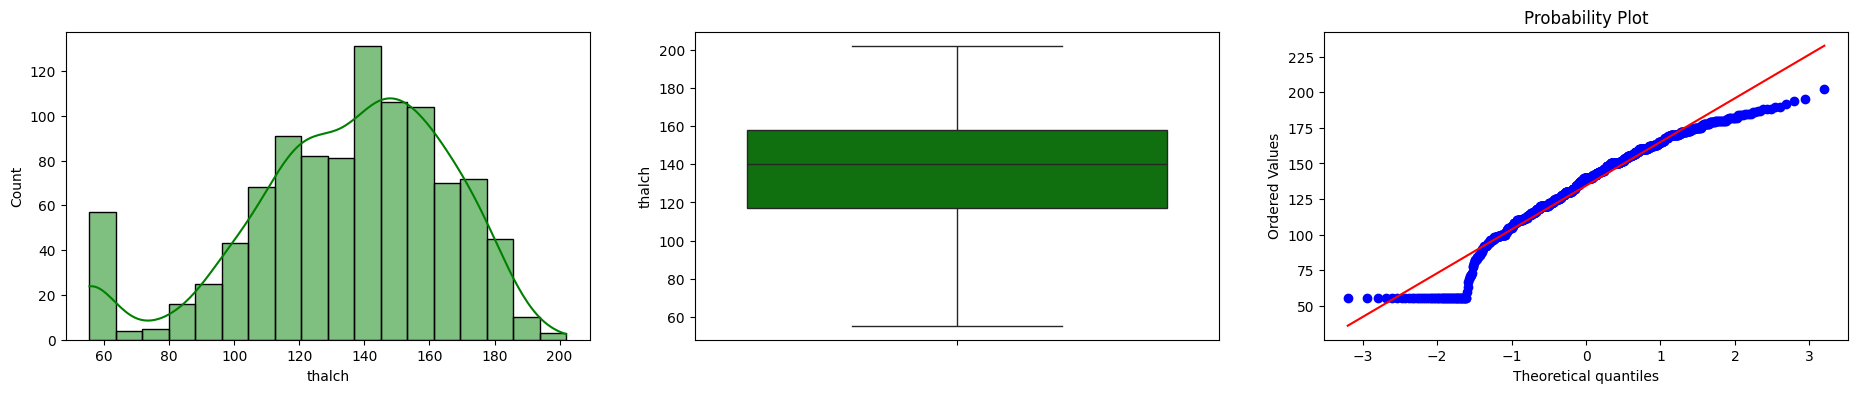

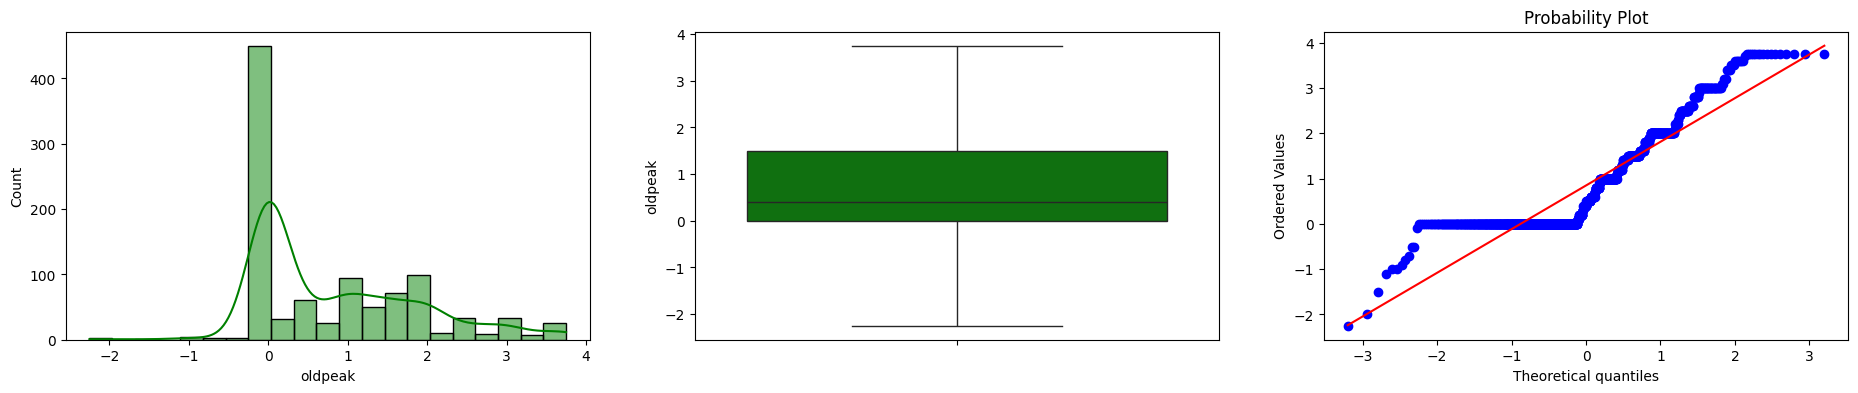

In [29]:
# Melakukan pemeriksaan kedua terhadap variabel numerik kontinu pada histogram dan menghilangkan distorsi dan anomali:
plt.figure(figsize=(30,120),facecolor='white')
plotnumber=1
for feature in continuous_feature:
                plt.figure(figsize=(23,4))
                plt.subplot(1,3,1)
                sns.histplot(df[feature],color="green", kde=True)
                plt.subplot(1,3,2)
                sns.boxplot(df[feature],color='green')
                plt.subplot(1,3,3)
                stat.probplot(df[feature],dist='norm',plot=pylab)
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [30]:
# data latih
X = df.iloc[:, ].values
X

array([[150.  ,   2.3 ,   0.  , ...,   1.  ,   0.  ,   0.  ],
       [108.  ,   1.5 ,   3.  , ...,   0.  ,   0.  ,   1.  ],
       [129.  ,   2.6 ,   2.  , ...,   1.  ,   0.  ,   0.  ],
       ...,
       [145.  ,   3.75,   3.  , ...,   1.  ,   0.  ,   0.  ],
       [146.  ,   1.8 ,   3.  , ...,   0.  ,   0.  ,   1.  ],
       [175.  ,   0.6 ,   0.  , ...,   0.  ,   1.  ,   0.  ]])

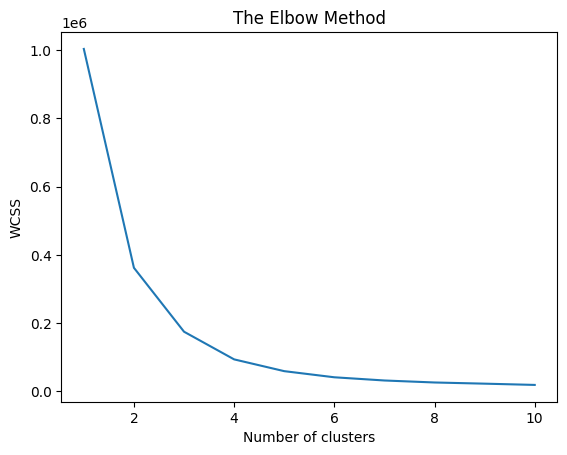

In [31]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [32]:
# Hitung Skor Siluet untuk jumlah klaster yang berbeda
for n_clusters in range(2, 11):
    kmeans =  KMeans(n_clusters = n_clusters, n_init=10)
    cluster_labels = kmeans.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Jumlah Cluster = {n_clusters}, Silhouette Score = {silhouette_avg}")

Jumlah Cluster = 2, Silhouette Score = 0.5613767213098397
Jumlah Cluster = 3, Silhouette Score = 0.5722345871234389
Jumlah Cluster = 4, Silhouette Score = 0.5316177129547429
Jumlah Cluster = 5, Silhouette Score = 0.523010110633471
Jumlah Cluster = 6, Silhouette Score = 0.510605911674774
Jumlah Cluster = 7, Silhouette Score = 0.4885559729738985
Jumlah Cluster = 8, Silhouette Score = 0.46709284061008777
Jumlah Cluster = 9, Silhouette Score = 0.46003625964937583
Jumlah Cluster = 10, Silhouette Score = 0.4645201891396157


In [33]:
# melakukan clustering assignments dan menyimpan nilainya pada kolom "y_kmeans"
kmeans = KMeans(n_clusters = 2, init = 'k-means++', n_init=10)
y_kmeans = kmeans.fit_predict(X)
df['Cluster'] = y_kmeans
df['Cluster']

,Cluster
0,1
1,0
2,1
3,1
4,1
...,...
1008,1
1009,1
1010,1
1011,1


In [34]:
df

,thalch,oldpeak,ca,Cholesterol_Group,Age_Group,trestbps_Group,thalch_Group,sex_Male,dataset_Hungary,dataset_Switzerland,...,slope_upsloping,thal_fixed defect,thal_normal,thal_reversable defect,Oldpeak_Category_Depresi ST Ringan,Oldpeak_Category_Depresi ST Sedang,Oldpeak_Category_Peningkatan ST Parah,Oldpeak_Category_Peningkatan ST Ringan,Oldpeak_Category_Peningkatan ST Sedang,Cluster
0,150.0,2.30,0.0,1,2,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
1,108.0,1.50,3.0,2,3,0,1,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,129.0,2.60,2.0,1,3,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
3,187.0,3.50,0.0,2,1,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,172.0,1.40,0.0,1,1,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,149.0,0.50,0.0,2,2,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,1
1009,151.0,0.40,0.0,2,3,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,1
1010,145.0,3.75,3.0,0,2,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1011,146.0,1.80,3.0,1,2,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1,1


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [35]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

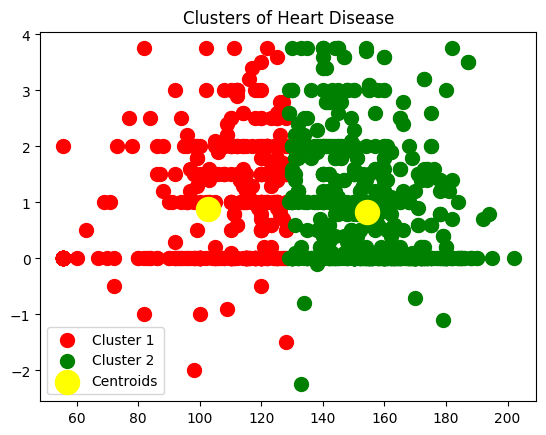

In [39]:
# Visualisasi hasil clustering dengan grafik scatter plot
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Heart Disease')
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [37]:
# Mendapatkan jumlah cluster
k = 2

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, y_kmeans, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[y_kmeans == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_thalch = cluster_data[:, 0].mean()
        mean_oldpeak = cluster_data[:, 1].mean()
        mean_ca = cluster_data[:, 2].mean()
        mean_cholectesterol_Group = cluster_data[:, 3].mean()
        mean_age_Group = cluster_data[:, 4].mean()
        mean_trestbps_Group = cluster_data[:, 5].mean()
        mean_thalch_Group = cluster_data[:, 6].mean()
        mean_sex_Male = cluster_data[:, 7].mean()
        mean_dataset_Hungary = cluster_data[:, 8].mean()
        mean_dataset_Switzerland = cluster_data[:, 9].mean()
        mean_dataset_VALongBeach = cluster_data[:, 10].mean()
        mean_atypical_angina = cluster_data[:, 11].mean()
        mean_nonanginal_pain = cluster_data[:, 12].mean()
        mean_typical_angina = cluster_data[:, 13].mean()
        mean_fbs_True = cluster_data[:, 14].mean()
        mean_fbs_None = cluster_data[:, 15].mean()
        mean_restecg_lv_hypertrophy = cluster_data[:, 16].mean()
        mean_restecg_normal = cluster_data[:, 17].mean()
        mean_restecg_st_t_abnormality = cluster_data[:, 18].mean()
        mean_exang_True = cluster_data[:, 19].mean()
        mean_exang_None = cluster_data[:, 20].mean()
        mean_slope_downsloping = cluster_data[:, 21].mean()
        mean_slope_flat = cluster_data[:, 22].mean()
        mean_slope_upsloping = cluster_data[:, 23].mean()
        mean_that_fixed_defect = cluster_data[:, 24].mean()
        mean_that_normal = cluster_data[:, 25].mean()
        mean_that_reversable_defect = cluster_data[:, 26].mean()
        mean_Oldpeak_Category_Depresi_ST_Ringan = cluster_data[:, 27].mean()
        mean_Oldpeak_Category_Depresi_ST_Sedang = cluster_data[:, 28].mean()
        mean_Oldpeak_Category_Peningkatan_ST_Parah = cluster_data[:, 29].mean()
        mean_Oldpeak_Category_Peningkatan_ST_Ringan = cluster_data[:, 30].mean()
        mean_Oldpeak_Category_Peningkatan_ST_Sedang = cluster_data[:, 31].mean()


        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata thalch: {mean_thalch:.2f}")
        print(f"Rata-rata oldpeak: {mean_oldpeak:.2f}")
        print(f"Rata-rata ca: {mean_ca:.2f}")
        print(f"Rata-rata Cholesterol_Group: {mean_cholectesterol_Group:.2f}")
        print(f"Rata-rata Age_Group: {mean_age_Group:.2f}")
        print(f"Rata-rata trestbps_Group: {mean_trestbps_Group:.2f}")
        print(f"Rata-rata thalch_Group: {mean_thalch_Group:.2f}")
        print(f"Rata-rata sex_Male: {mean_sex_Male:.2f}")
        print(f"Rata-rata dataset_Hungary: {mean_dataset_Hungary:.2f}")
        print(f"Rata-rata dataset_Switzerland: {mean_dataset_Switzerland:.2f}")
        print(f"Rata-rata dataset_VALongBeach: {mean_dataset_VALongBeach:.2f}")
        print(f"Rata-rata atypical_angina: {mean_atypical_angina:.2f}")
        print(f"Rata-rata nonanginal_pain: {mean_nonanginal_pain:.2f}")
        print(f"Rata-rata typical_angina: {mean_typical_angina:.2f}")
        print(f"Rata-rata fbs_True: {mean_fbs_True:.2f}")
        print(f"Rata-rata fbs_None: {mean_fbs_None:.2f}")
        print(f"Rata-rata restecg_lv_hypertrophy: {mean_restecg_lv_hypertrophy:.2f}")
        print(f"Rata-rata restecg_normal: {mean_restecg_normal:.2f}")
        print(f"Rata-rata restecg_st_t_abnormality: {mean_restecg_st_t_abnormality:.2f}")
        print(f"Rata-rata exang_True: {mean_exang_True:.2f}")
        print(f"Rata-rata exang_None: {mean_exang_None:.2f}")
        print(f"Rata-rata slope_downsloping: {mean_slope_downsloping:.2f}")
        print(f"Rata-rata slope_flat: {mean_slope_flat:.2f}")
        print(f"Rata-rata slope_upsloping: {mean_slope_upsloping:.2f}")
        print(f"Rata-rata that_fixed_defect: {mean_that_fixed_defect:.2f}")
        print(f"Rata-rata that_normal: {mean_that_normal:.2f}")
        print(f"Rata-rata that_reversable_defect: {mean_that_reversable_defect:.2f}")
        print(f"Rata-rata Oldpeak_Category_Depresi_ST_Ringan: {mean_Oldpeak_Category_Depresi_ST_Ringan:.2f}")
        print(f"Rata-rata Oldpeak_Category_Depresi_ST_Sedang: {mean_Oldpeak_Category_Depresi_ST_Sedang:.2f}")
        print(f"Rata-rata Oldpeak_Category_Peningkatan_ST_Parah: {mean_Oldpeak_Category_Peningkatan_ST_Parah:.2f}")
        print(f"Rata-rata Oldpeak_Category_Peningkatan_ST_Ringan: {mean_Oldpeak_Category_Peningkatan_ST_Ringan:.2f}")
        print(f"Rata-rata Oldpeak_Category_Peningkatan_ST_Sedang: {mean_Oldpeak_Category_Peningkatan_ST_Sedang:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(X, y_kmeans, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata thalch: 102.62
Rata-rata oldpeak: 0.89
Rata-rata ca: 0.19
Rata-rata Cholesterol_Group: 0.88
Rata-rata Age_Group: 1.98
Rata-rata trestbps_Group: 0.00
Rata-rata thalch_Group: 0.65
Rata-rata sex_Male: 0.88
Rata-rata dataset_Hungary: 0.24
Rata-rata dataset_Switzerland: 0.20
Rata-rata dataset_VALongBeach: 0.41
Rata-rata atypical_angina: 0.09
Rata-rata nonanginal_pain: 0.18
Rata-rata typical_angina: 0.04
Rata-rata fbs_True: 0.16
Rata-rata fbs_None: 0.12
Rata-rata restecg_lv_hypertrophy: 0.17
Rata-rata restecg_normal: 0.56
Rata-rata restecg_st_t_abnormality: 0.26
Rata-rata exang_True: 0.50
Rata-rata exang_None: 0.14
Rata-rata slope_downsloping: 0.09
Rata-rata slope_flat: 0.45
Rata-rata slope_upsloping: 0.10
Rata-rata that_fixed_defect: 0.05
Rata-rata that_normal: 0.12
Rata-rata that_reversable_defect: 0.24
Rata-rata Oldpeak_Category_Depresi_ST_Ringan: 0.01
Rata-rata Oldpeak_Category_Depresi_ST_Sedang: 0.01
Rata-rata Oldpeak_Category

Tulis hasil interpretasinya di sini.
1. **Analisis Cluster 1 :**
- Pada klaster ini didominasi oleh pasien dengan rata-rata detak jantung dalam ketegori **normal** yaitu berkisar antara 120 hingga 160. Namun mendekati batas atas dari detak jantung normal manusia.
- Kemudian, rata-rata didominasi pasien pada kelompok **Peningkatan ST Ringan** jika berolahraga maupun istirahat.
- Dari jumlah pembuluh darah, rata-rata pasien memiliki nilai mendekati 0 yang berarti **sangat sedikit**.
- Dari kadar kolesterol pasien, cemderung rata-rata **normal** pada rentang 200 hingga 400 mg/dl.
- Dari usia pasien, rata-rata dominasi pada rentang usia **49 hingga 64 tahun**.
- Dari segi tekanan darah saat pasien istirahat, rata-rata pasien berada **di bawah 60 mmHg**.
- Dari gender pasien, rata-rata didominasi oleh **laki-laki**.
- Dari sumber dataset pasien diperoleh, rata-rata didominasi oleh data dari rumah sakit di **Hungary**.
- Dari jenis nyeri dada yang dialami pasien, rata-rata bertipe **non-anginal pain**.
- Dari segi gula darah pasien, rata-rata cenderung berada **di bawah 120 mg/dl**.
- Dari hasil elektrokardiografi pasien saat istirahat, rata-rata cenderung **normal**.
- Dari nyeri dada yang dialami pasien saat berolahraga, rata-rata pasien **tidak mengalaminya**.
- Dari hasil pengukuran seberapa banyak segmen ST bergeser relatif terhadap peningkatan denyut jantung pasien selama berolahraga, rata-rata pasien cenderung **slope_upsloping** atau mengalami peningkatan signifikan.
- Dari hasil pengecekan terkait kelainan darah yang disebut thalassemia, rata-rata pasien tidak mengalaminya atau **normal**.


2. **Analisis Cluster 2 :**
- Pada klaster ini didominasi oleh pasien dengan rata-rata detak jantung dalam kategori **di bawah normal** yaitu dibawah 120.
- Kemudian, rata-rata didominasi pasien dalam kelompok **Peningkatan ST Ringan** jika berolahraga maupun istirahat.
- Dari jumlah pembuluh darah, rata-rata pasien memiliki nilai mendekati 0 yang berarti **sangat sedikit** dan nilainya dibawah pasien pada klaster 1.
- Dari kadar kolesterol pasein, cenderung rata-rata **di bawah normal** yaitu < 200 mg/dl.
- Dari usia pasien, rata-rata didominasi pada rentang **usia 49 hingga 64**.
- Dari segi tekanan darah pasien saat istirahat, rata-rata pasien berada **di bawah 60mmHg**.
- Dari gender pasien, rata-rata didominasi oleh **laki-laki**.
- Dari sumber dataset pasien diperoleh, rata-rata didominasi oleh data dari rumah sakit di **VA Long Beach**.
- Dari jenis nyeri dada yang dialami pasien, rata-rata bertipe **non-anginal pain**.
- Dari segi gula darah pasien, rata-rata cenderung berada **di bawah 120 mg/dl**.
- Dari hasil eletrokardiografi pasien saat istirahat, rata-rata cenderung **normal**.
- Dari nyeri dada yang dialami pasien saat berolahraga, rata-rata **tidak memiliki nyeri dada**.
- Dari hasil pengukuran seberapa banyak segment ST bergeser relatif terhadap peningkatan denyut jantung pasien selama berolahraga, rata-rata pasien cenderung **slope flat** atau peningkatannya tidak begitu signifikan terjadi.
- Dari hasil pengecekan terkait kelainan darah yang disebut thalassemia, rata-rata pasien **reversible defect** atau mengalaminya tetapi bisa disembuhkan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [38]:
df.to_csv('heart_disease_final.csv', index=False)